In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict


In [2]:
#track_path = 'data/tracks.csv'
#playlist_path = 'data/playlists.csv'

track_path = 'tracks.csv'
playlist_path = 'playlists.csv'

In [3]:
tracks = pd.read_csv(track_path)
tracks = tracks.drop(['Unnamed: 0'], axis=1)
tracks = tracks.drop_duplicates(subset=['Track_ID'])
tracks

,Track_ID,Popularity,Release Date,Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,44uuZDQFAtfag94mDPIsEu,0,2017-06-14,True,https://open.spotify.com/track/44uuZDQFAtfag94...,0.571,0.578,8,-9.696,0,0.2700,0.254000,0.000002,0.1130,0.338,133.731
1,0Vwfd6fxFrL3kCnZSJ9vid,0,2013-01-01,True,https://open.spotify.com/track/0Vwfd6fxFrL3kCn...,0.740,0.716,6,-5.796,0,0.0609,0.207000,0.000004,0.0926,0.804,117.977
2,2Ze0YvSXz8CnC81hw5rXNo,17,2015-10-16,False,https://open.spotify.com/track/2Ze0YvSXz8CnC81...,0.610,0.766,2,-5.663,1,0.0267,0.023300,0.014800,0.1070,0.582,107.483
3,34hMOtKwf5nm8tjvkGV0Dk,46,2016-05-06,False,https://open.spotify.com/track/34hMOtKwf5nm8tj...,0.706,0.324,6,-14.048,0,0.0305,0.167000,0.104000,0.1160,0.114,119.992
4,6EpRaXYhGOB3fj4V2uDkMJ,0,2017-05-18,False,https://open.spotify.com/track/6EpRaXYhGOB3fj4...,0.869,0.485,6,-5.595,1,0.0545,0.246000,0.000000,0.0765,0.527,106.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,0qV2BL27Zyt2eDRY2bEXwm,0,2013-11-12,False,https://open.spotify.com/track/0qV2BL27Zyt2eDR...,0.167,0.541,10,-15.661,0,0.0418,0.167000,0.000000,0.2740,0.198,104.697
73625,1ow3AaNmv1uCQbKRxZoRqn,0,1999-05-04,False,https://open.spotify.com/track/1ow3AaNmv1uCQbK...,0.766,0.335,7,-20.677,1,0.0430,0.919000,0.841000,0.0969,0.802,96.030
73642,1BkeuMWQzM8QNDrAqkmGBM,32,2012-01-01,False,https://open.spotify.com/track/1BkeuMWQzM8QNDr...,0.450,0.947,5,-3.347,1,0.0455,0.000512,0.000000,0.3870,0.855,164.019
73646,386DfI5sZ0eJi1i6SZVqLw,37,2015-08-07,False,https://open.spotify.com/track/386DfI5sZ0eJi1i...,0.566,0.934,5,-2.036,0,0.0495,0.048200,0.000000,0.2470,0.858,101.985


In [4]:
playlists = pd.read_csv(playlist_path)
playlists = playlists.drop(['Unnamed: 0', 'track_uri', 'album_uri', 'artist_uri'], axis=1)
playlists

,pid,name,artist_name,track_name,duration_ms,album_name,track_id
0,549003,August,C-Trox,Passionate,206001,Passionate,44uuZDQFAtfag94mDPIsEu
1,549003,August,Watsky,Sloppy Seconds,245933,Cardboard Castles,0Vwfd6fxFrL3kCnZSJ9vid
2,549003,August,Maritime,Roaming Empire,234960,Magnetic Bodies/Maps of Bones,2Ze0YvSXz8CnC81hw5rXNo
3,549003,August,RY X,Howling,309590,Dawn,34hMOtKwf5nm8tjvkGV0Dk
4,549003,August,Liam Payne,Strip That Down,204502,Strip That Down,6EpRaXYhGOB3fj4V2uDkMJ
...,...,...,...,...,...,...,...
91593,679459,Country music,Florida Georgia Line,H.O.L.Y.,194186,Dig Your Roots,0BCy325UZyR9z0t0uxwn2N
91594,679459,Country music,Sam Hunt,Make You Miss Me,225693,Montevallo,5BbYPT6ehZf0hSv2su6JAl
91595,679459,Country music,Jon Pardi,Dirt On My Boots,201893,California Sunrise,7f08qp3HROTkfrtNpiYGGo
91596,679459,Country music,Luke Bryan,Roller Coaster,259079,Crash My Party,5r00wpsojd4mBYaQFDvni7


In [5]:
# drop the duplicates in the same playlist

playlists = playlists.drop_duplicates(subset=['pid', 'track_id'])
playlists

,pid,name,artist_name,track_name,duration_ms,album_name,track_id
0,549003,August,C-Trox,Passionate,206001,Passionate,44uuZDQFAtfag94mDPIsEu
1,549003,August,Watsky,Sloppy Seconds,245933,Cardboard Castles,0Vwfd6fxFrL3kCnZSJ9vid
2,549003,August,Maritime,Roaming Empire,234960,Magnetic Bodies/Maps of Bones,2Ze0YvSXz8CnC81hw5rXNo
3,549003,August,RY X,Howling,309590,Dawn,34hMOtKwf5nm8tjvkGV0Dk
4,549003,August,Liam Payne,Strip That Down,204502,Strip That Down,6EpRaXYhGOB3fj4V2uDkMJ
...,...,...,...,...,...,...,...
91593,679459,Country music,Florida Georgia Line,H.O.L.Y.,194186,Dig Your Roots,0BCy325UZyR9z0t0uxwn2N
91594,679459,Country music,Sam Hunt,Make You Miss Me,225693,Montevallo,5BbYPT6ehZf0hSv2su6JAl
91595,679459,Country music,Jon Pardi,Dirt On My Boots,201893,California Sunrise,7f08qp3HROTkfrtNpiYGGo
91596,679459,Country music,Luke Bryan,Roller Coaster,259079,Crash My Party,5r00wpsojd4mBYaQFDvni7


In [6]:
tracks.dtypes

Track_ID             object
Popularity            int64
Release Date         object
Explicit               bool
External URLs        object
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
dtype: object

In [7]:
playlists.dtypes

pid             int64
name           object
artist_name    object
track_name     object
duration_ms     int64
album_name     object
track_id       object
dtype: object

In [8]:
tracks = tracks.drop(['External URLs'], axis=1)
tracks

,Track_ID,Popularity,Release Date,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,44uuZDQFAtfag94mDPIsEu,0,2017-06-14,True,0.571,0.578,8,-9.696,0,0.2700,0.254000,0.000002,0.1130,0.338,133.731
1,0Vwfd6fxFrL3kCnZSJ9vid,0,2013-01-01,True,0.740,0.716,6,-5.796,0,0.0609,0.207000,0.000004,0.0926,0.804,117.977
2,2Ze0YvSXz8CnC81hw5rXNo,17,2015-10-16,False,0.610,0.766,2,-5.663,1,0.0267,0.023300,0.014800,0.1070,0.582,107.483
3,34hMOtKwf5nm8tjvkGV0Dk,46,2016-05-06,False,0.706,0.324,6,-14.048,0,0.0305,0.167000,0.104000,0.1160,0.114,119.992
4,6EpRaXYhGOB3fj4V2uDkMJ,0,2017-05-18,False,0.869,0.485,6,-5.595,1,0.0545,0.246000,0.000000,0.0765,0.527,106.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,0qV2BL27Zyt2eDRY2bEXwm,0,2013-11-12,False,0.167,0.541,10,-15.661,0,0.0418,0.167000,0.000000,0.2740,0.198,104.697
73625,1ow3AaNmv1uCQbKRxZoRqn,0,1999-05-04,False,0.766,0.335,7,-20.677,1,0.0430,0.919000,0.841000,0.0969,0.802,96.030
73642,1BkeuMWQzM8QNDrAqkmGBM,32,2012-01-01,False,0.450,0.947,5,-3.347,1,0.0455,0.000512,0.000000,0.3870,0.855,164.019
73646,386DfI5sZ0eJi1i6SZVqLw,37,2015-08-07,False,0.566,0.934,5,-2.036,0,0.0495,0.048200,0.000000,0.2470,0.858,101.985


In [9]:
tracks['Release Date'] = pd.to_datetime(tracks['Release Date'], format='%Y-%m-%d', errors='coerce')
tracks

,Track_ID,Popularity,Release Date,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,44uuZDQFAtfag94mDPIsEu,0,2017-06-14,True,0.571,0.578,8,-9.696,0,0.2700,0.254000,0.000002,0.1130,0.338,133.731
1,0Vwfd6fxFrL3kCnZSJ9vid,0,2013-01-01,True,0.740,0.716,6,-5.796,0,0.0609,0.207000,0.000004,0.0926,0.804,117.977
2,2Ze0YvSXz8CnC81hw5rXNo,17,2015-10-16,False,0.610,0.766,2,-5.663,1,0.0267,0.023300,0.014800,0.1070,0.582,107.483
3,34hMOtKwf5nm8tjvkGV0Dk,46,2016-05-06,False,0.706,0.324,6,-14.048,0,0.0305,0.167000,0.104000,0.1160,0.114,119.992
4,6EpRaXYhGOB3fj4V2uDkMJ,0,2017-05-18,False,0.869,0.485,6,-5.595,1,0.0545,0.246000,0.000000,0.0765,0.527,106.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,0qV2BL27Zyt2eDRY2bEXwm,0,2013-11-12,False,0.167,0.541,10,-15.661,0,0.0418,0.167000,0.000000,0.2740,0.198,104.697
73625,1ow3AaNmv1uCQbKRxZoRqn,0,1999-05-04,False,0.766,0.335,7,-20.677,1,0.0430,0.919000,0.841000,0.0969,0.802,96.030
73642,1BkeuMWQzM8QNDrAqkmGBM,32,2012-01-01,False,0.450,0.947,5,-3.347,1,0.0455,0.000512,0.000000,0.3870,0.855,164.019
73646,386DfI5sZ0eJi1i6SZVqLw,37,2015-08-07,False,0.566,0.934,5,-2.036,0,0.0495,0.048200,0.000000,0.2470,0.858,101.985


In [10]:
tracks.dtypes

Track_ID                    object
Popularity                   int64
Release Date        datetime64[ns]
Explicit                      bool
Danceability               float64
Energy                     float64
Key                          int64
Loudness                   float64
Mode                         int64
Speechiness                float64
Acousticness               float64
Instrumentalness           float64
Liveness                   float64
Valence                    float64
Tempo                      float64
dtype: object

In [11]:
tracks['Explicit'] = tracks['Explicit'].astype(int)
tracks

,Track_ID,Popularity,Release Date,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,44uuZDQFAtfag94mDPIsEu,0,2017-06-14,1,0.571,0.578,8,-9.696,0,0.2700,0.254000,0.000002,0.1130,0.338,133.731
1,0Vwfd6fxFrL3kCnZSJ9vid,0,2013-01-01,1,0.740,0.716,6,-5.796,0,0.0609,0.207000,0.000004,0.0926,0.804,117.977
2,2Ze0YvSXz8CnC81hw5rXNo,17,2015-10-16,0,0.610,0.766,2,-5.663,1,0.0267,0.023300,0.014800,0.1070,0.582,107.483
3,34hMOtKwf5nm8tjvkGV0Dk,46,2016-05-06,0,0.706,0.324,6,-14.048,0,0.0305,0.167000,0.104000,0.1160,0.114,119.992
4,6EpRaXYhGOB3fj4V2uDkMJ,0,2017-05-18,0,0.869,0.485,6,-5.595,1,0.0545,0.246000,0.000000,0.0765,0.527,106.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,0qV2BL27Zyt2eDRY2bEXwm,0,2013-11-12,0,0.167,0.541,10,-15.661,0,0.0418,0.167000,0.000000,0.2740,0.198,104.697
73625,1ow3AaNmv1uCQbKRxZoRqn,0,1999-05-04,0,0.766,0.335,7,-20.677,1,0.0430,0.919000,0.841000,0.0969,0.802,96.030
73642,1BkeuMWQzM8QNDrAqkmGBM,32,2012-01-01,0,0.450,0.947,5,-3.347,1,0.0455,0.000512,0.000000,0.3870,0.855,164.019
73646,386DfI5sZ0eJi1i6SZVqLw,37,2015-08-07,0,0.566,0.934,5,-2.036,0,0.0495,0.048200,0.000000,0.2470,0.858,101.985


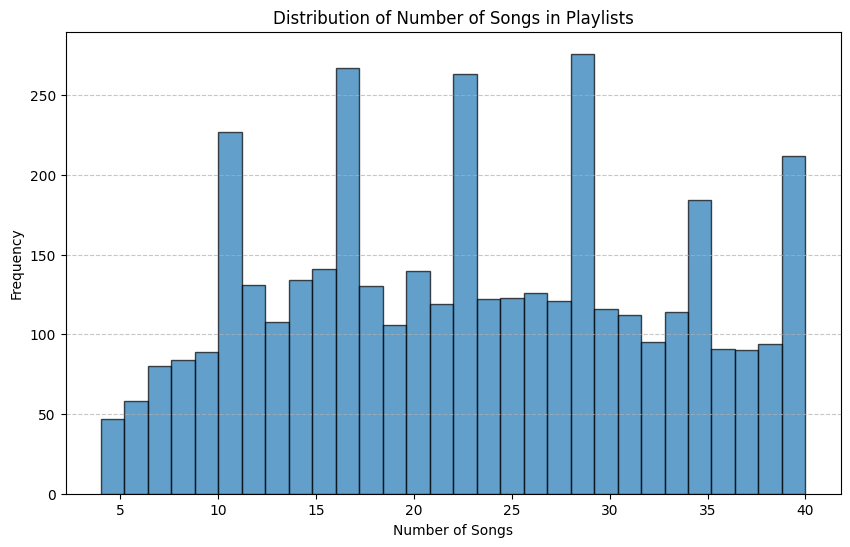

In [12]:
import matplotlib.pyplot as plt

song_counts = playlists.groupby('pid').size()

# Step 3: Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(song_counts, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Songs in Playlists')
plt.xlabel('Number of Songs')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
numeric_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
                    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

scaler = MinMaxScaler()
tracks[numeric_features] = scaler.fit_transform(tracks[numeric_features])


In [14]:
def get_user_playlist_tracks(playlist_df, pid):
    """
    Given a specific playlist id (pid), return all the track_ids in that playlist.
    """
    
    user_playlist = playlist_df[playlist_df['pid'] == pid]
    user_track_ids = user_playlist['track_id'].unique()
    return user_playlist, user_track_ids


In [15]:
def build_user_profile(tracks_df, user_track_ids, numeric_features):
    """
    Build a user profile from the user's tracks by averaging the feature vectors
    of the songs in their playlist.
    """
    user_tracks = tracks_df[tracks_df['Track_ID'].isin(user_track_ids)]
    if user_tracks.empty:
        return None
    user_profile = user_tracks[numeric_features].mean(axis=0).values.reshape(1, -1)
    return user_profile

In [16]:
def compute_content_scores(tracks_df, user_profile, user_track_ids, numeric_features):
    """
    Compute content-based similarity scores for all candidate tracks.
    """
    # Candidate tracks: those not in the user's playlist
    candidate_tracks = tracks_df[~tracks_df['Track_ID'].isin(user_track_ids)].copy()
    if candidate_tracks.empty:
        return pd.DataFrame(columns=['Track_ID', 'content_score'])
    
    candidate_features = candidate_tracks[numeric_features].values
    similarities = cosine_similarity(candidate_features, user_profile)
    candidate_tracks['content_score'] = similarities[:, 0]
    return candidate_tracks[['Track_ID', 'content_score']]



In [16]:
#def build_cooccurrence_matrix(playlist_df):
#    """
#    Build a simple co-occurrence dictionary:
#    For each track, store counts of how often it appears with other tracks.
#    """
#    # Group playlists by pid and get track lists
#    grouped = playlist_df.groupby('pid')['track_id'].apply(list)
#    
#    cooccurrence = defaultdict(Counter)
#    for track_list in grouped:
#        for i in range(len(track_list)):
#            for j in range(i+1, len(track_list)):
#                t1, t2 = track_list[i], track_list[j]
#                cooccurrence[t1][t2] += 1
#                cooccurrence[t2][t1] += 1
#    return cooccurrence

In [17]:
def build_cooccurrence_df(playlist_df):
    grouped = playlist_df.groupby('pid')['track_id'].apply(list)
    records = []
    for track_list in grouped:
        # Generate all unique pairs in the playlist
        for i in range(len(track_list)):
            for j in range(i+1, len(track_list)):
                t1, t2 = track_list[i], track_list[j]
                # Add both directions to maintain symmetry
                records.append((t1, t2, 1))
                records.append((t2, t1, 1))
                
    cooccurrence_df = pd.DataFrame(records, columns=['track_id_1', 'track_id_2', 'count'])

    # Aggregate counts for each pair
    cooccurrence_df = cooccurrence_df.groupby(['track_id_1', 'track_id_2'], as_index=False)['count'].sum()
    return cooccurrence_df

conc_df = build_cooccurrence_df(playlists)


In [18]:
track_info = playlists[['track_id', 'artist_name', 'track_name']].drop_duplicates('track_id')

conc_with_info = conc_df.merge(track_info, how='left', left_on='track_id_1', right_on='track_id')
conc_with_info.rename(columns={
    'artist_name': 'artist_name_1', 
    'track_name': 'track_name_1'
}, inplace=True)
conc_with_info.drop(columns=['track_id'], inplace=True)

conc_with_info = conc_with_info.merge(track_info, how='left', left_on='track_id_2', right_on='track_id')
conc_with_info.rename(columns={
    'artist_name': 'artist_name_2', 
    'track_name': 'track_name_2'
}, inplace=True)
conc_with_info.drop(columns=['track_id'], inplace=True)

top_pairs = conc_with_info.sort_values(by='count', ascending=False).head(30)
#print(top_pairs[['artist_name_1', 'track_name_1', 'artist_name_2', 'track_name_2', 'count']])

for _, row in top_pairs.iterrows():
    print(f"{row['artist_name_1']} - {row['track_name_1']} | {row['artist_name_2']} - {row['track_name_2']} | count: {row['count']}")



#print(conc_df.sort_values(by='count', ascending=False).head(10))

Kendrick Lamar - DNA. | Kendrick Lamar - HUMBLE. | count: 26
Kendrick Lamar - HUMBLE. | Post Malone - Congratulations | count: 26
Kendrick Lamar - HUMBLE. | Kendrick Lamar - DNA. | count: 26
Post Malone - Congratulations | Kendrick Lamar - HUMBLE. | count: 26
Kendrick Lamar - HUMBLE. | Future - Mask Off | count: 24
DRAM - Broccoli (feat. Lil Yachty) | Aminé - Caroline | count: 24
Justin Bieber - Sorry | Justin Bieber - What Do You Mean? | count: 24
Aminé - Caroline | DRAM - Broccoli (feat. Lil Yachty) | count: 24
Justin Bieber - What Do You Mean? | Justin Bieber - Sorry | count: 24
Future - Mask Off | Kendrick Lamar - HUMBLE. | count: 24
Luis Fonsi - Despacito - Remix | DJ Khaled - I'm the One | count: 23
DJ Khaled - I'm the One | Luis Fonsi - Despacito - Remix | count: 23
Kendrick Lamar - HUMBLE. | Big Sean - Bounce Back | count: 22
Big Sean - Bounce Back | Aminé - Caroline | count: 22
Aminé - Caroline | Big Sean - Bounce Back | count: 22
Kendrick Lamar - HUMBLE. | Lil Uzi Vert - XO T

In [17]:
'''
def compute_collaborative_scores(user_track_ids, cooccurrence, all_track_ids):
    """
    Compute a collaborative score for all candidate tracks based on their
    co-occurrence with the user's playlist tracks.
    """
    # Count occurrences of each candidate track with the user's tracks
    track_scores = Counter()
    for ut in user_track_ids:
        if ut in cooccurrence:
            for candidate, count in cooccurrence[ut].items():
                if candidate not in user_track_ids:  # candidate should not be already in user's playlist
                    track_scores[candidate] += count

    # Convert to a DataFrame
    if len(track_scores) == 0:
        return pd.DataFrame(columns=['Track_ID', 'collab_score'])
    
    collab_df = pd.DataFrame(track_scores.items(), columns=['Track_ID', 'collab_score'])
    
    # Normalize collab_score to [0,1]
    if collab_df['collab_score'].max() != 0:
        collab_df['collab_score'] = collab_df['collab_score'] / collab_df['collab_score'].max()
    else:
        collab_df['collab_score'] = 0
    
    # Filter only tracks that exist in all_track_ids
    collab_df = collab_df[collab_df['Track_ID'].isin(all_track_ids)]
    return collab_df
'''

In [19]:
def compute_collaborative_scores_df(user_track_ids, cooccurrence_df, all_track_ids):
    # Filter for pairs where track_id_1 is a user track
    user_cooccurrences = cooccurrence_df[cooccurrence_df['track_id_1'].isin(user_track_ids)]
    
    # Exclude tracks the user already has
    user_cooccurrences = user_cooccurrences[~user_cooccurrences['track_id_2'].isin(user_track_ids)]
    
    # Aggregate counts per candidate track
    collab_df = user_cooccurrences.groupby('track_id_2', as_index=False)['count'].sum()
    collab_df.rename(columns={'track_id_2': 'Track_ID', 'count': 'collab_score'}, inplace=True)
    
    # Normalize scores
    if collab_df['collab_score'].max() != 0:
        collab_df['collab_score'] = collab_df['collab_score'] / collab_df['collab_score'].max()
    else:
        collab_df['collab_score'] = 0
    
    # Filter to only include tracks in all_track_ids
    collab_df = collab_df[collab_df['Track_ID'].isin(all_track_ids)]
    return collab_df


In [21]:
def hybrid_recommendations(tracks_df, user_profile, user_track_ids, numeric_features, cooccurrence_df, top_n=10, alpha=0.5):
    # Compute content scores
    content_scores = compute_content_scores(tracks_df, user_profile, user_track_ids, numeric_features)
    
    # Compute collaborative scores using the new DF-based function
    all_track_ids = set(tracks_df['Track_ID'].unique())
    collab_scores = compute_collaborative_scores_df(user_track_ids, cooccurrence_df, all_track_ids)
    
    # Merge on Track_ID
    combined = pd.merge(content_scores, collab_scores, on='Track_ID', how='outer').fillna(0)
    
    # Hybrid score
    combined['hybrid_score'] = alpha * combined['content_score'] + (1 - alpha) * combined['collab_score']
    
    # Sort by hybrid score and return top N
    combined = combined.sort_values('hybrid_score', ascending=False)
    return combined.head(top_n)['Track_ID'].tolist()


In [28]:
user_playlist, user_track_ids = get_user_playlist_tracks(playlists, 679430)
print(user_playlist)

          pid    name      artist_name  \
91387  679430  matts        Logan Paul   
91388  679430  matts           Ricegum   
91389  679430  matts             Logic   
91390  679430  matts             Logic   
91391  679430  matts             Logic   
91392  679430  matts        Marshmello   
91393  679430  matts        Luis Fonsi   
91394  679430  matts             B.o.B   
91395  679430  matts        Kanye West   
91396  679430  matts             Logic   
91397  679430  matts   Christina Perri   
91398  679430  matts    Kendrick Lamar   
91399  679430  matts       Jon Bellion   

                                              track_name  duration_ms  \
91387  Help Me Help You (feat. Why Don't We) (GARABAT...       199285   
91388                                Its Every Night Sis       155193   
91389                                     1-800-273-8255       250173   
91390                                          Everybody       162346   
91391                                       Ta

In [29]:
print(user_track_ids)

['4Cpa6lUScJygMT8f6VERZ2' '15Uxmx6D6hW0gY5kc7bpqU'
 '5tz69p7tJuGPeMGwNTxYuV' '7cGFbx7MP0H23iHZTZpqMM'
 '6HN5XPJEV31RQJGoyqZ81K' '7vGuf3Y35N4wmASOKLUVVU'
 '4aWmUDTfIPGksMNLV2rQP2' '6lV2MSQmRIkycDScNtrBXO'
 '6C7RJEIUDqKkJRZVWdkfkH' '5LME7YULt0enp6UAB8VoDn'
 '0HZhYMZOcUzZKSFwPOti6m' '7KXjTSCq5nL1LoYtL7XAwS'
 '1CnPYaKxTVb4LWOtiGOm0m']


In [25]:
user_profile = build_user_profile(tracks, user_track_ids, numeric_features)

cooccurrence = build_cooccurrence_df(playlists)

In [27]:
print(numeric_features)
print(user_profile)

['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
[[0.22251462 0.59924355 0.5435     0.79365908 0.07500822 0.37170973
  0.04855014 0.17068121 0.38261089 0.52114383]]


In [60]:
recommendations = hybrid_recommendations(
        tracks,
        user_profile,
        user_track_ids,
        numeric_features,
        cooccurrence,
        top_n=10,
        alpha=0.5  # adjust this weight as desired
    )

print("Hybrid Recommended Track IDs:", recommendations)





                  Track_ID  Popularity Release Date  Explicit  Danceability  \
38  6xVq4SrxJHWLLKq91ZeCqm    0.422222   1991-09-23         0      0.262146   
39  6ZfrCKtg5sw6zg5BxKKR3g    0.000000   2005-06-07         0      0.608300   
40  5LnEJ9AkSrp2uxISQtj0eo    0.000000   1996-06-25         0      0.501012   
41  6Sx4sIggsnKOe9NPf7i2Zt    0.000000   2006-01-01         0      0.814777   
42  6g3RUqmBZavnuGllFN0WrL    0.000000   2005-01-01         0      0.734818   

    Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
38   0.737    4  0.725348     1     0.041771      0.065964          0.000005   
39   0.667    8  0.760094     1     0.036563      0.289157          0.003460   
40   0.715    6  0.781696     1     0.517708      0.135542          0.000001   
41   0.738    0  0.843481     1     0.233333      0.025602          0.000000   
42   0.965   11  0.924577     0     0.103542      0.001245          0.000000   

    Liveness   Valence     Tempo  content_sc

In [37]:
def train_test_split_playlists(playlists, test_ratio=0.2):
    train_data = []
    test_data = []
    for pid, group in playlists.groupby('pid'):
        tracks = group['track_id'].tolist()
        split_index = int(len(tracks)*(1-test_ratio))
        train_tracks = tracks[:split_index]
        test_tracks = tracks[split_index:]
        
        for t in train_tracks:
            train_data.append({'pid': pid, 'track_id': t})
        for t in test_tracks:
            test_data.append({'pid': pid, 'track_id': t})
            
    train_df = pd.DataFrame(train_data)
    test_df = pd.DataFrame(test_data)
    return train_df, test_df


In [48]:
def evaluate_model(tracks_df, playlist_df, numeric_features, cooccurrence, alpha=0.5, top_n=25):
    # Split into train and test
    train_df, test_df = train_test_split_playlists(playlist_df, test_ratio=0.2)
    
    # Group test tracks by user for quick lookup
    test_dict = test_df.groupby('pid')['track_id'].apply(set).to_dict()

    precisions, recalls = [], []
    count = 0
    for pid in train_df['pid'].unique():
        
        if count > 5:
            break
        
        user_train_tracks = train_df[train_df['pid'] == pid]['track_id'].unique()
        user_test_tracks = test_dict.get(pid, set())

        # If no test tracks, skip
        if len(user_test_tracks) == 0:
            continue

        # Build user profile and generate recommendations (as before)
        user_profile = build_user_profile(tracks_df, user_train_tracks, numeric_features)
        if user_profile is None:
            continue

        recommendations = hybrid_recommendations(
            tracks_df,
            user_profile,
            user_train_tracks,
            numeric_features,
            cooccurrence,
            top_n=top_n,
            alpha=alpha
        )

        recommended_set = set(recommendations)
        hit_count = len(recommended_set.intersection(user_test_tracks))
        
        
        print(f"Length of test: {len(user_test_tracks)} | Length of recommendations: {len(recommended_set)}")
        print(f"Hit count: {hit_count}")

        precision = hit_count / top_n
        recall = hit_count / len(user_test_tracks)

        precisions.append(precision)
        recalls.append(recall)
        
        print(f"Recall: {recall}")
        
        count += 1
        


    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0
    #print(f"Average Precision: {avg_precision}")
    return avg_precision, avg_recall

# Example usage after model building:
# mean_precision, mean_recall = evaluate_model(tracks_df, playlist_df, numeric_features, cooccurrence, alpha=0.5, top_n=10)
# print("Mean Precision@10:", mean_precision)
# print("Mean Recall@10:", mean_recall)

In [49]:
avg_precision, avg_recall = evaluate_model(tracks, playlists, numeric_features, cooccurrence, alpha=0.5, top_n=10)

Length of test: 8 | Length of recommendations: 10
Hit count: 4
Recall: 0.5
Length of test: 2 | Length of recommendations: 10
Hit count: 2
Recall: 1.0
Length of test: 5 | Length of recommendations: 10
Hit count: 1
Recall: 0.2
Length of test: 3 | Length of recommendations: 10
Hit count: 3
Recall: 1.0
Length of test: 7 | Length of recommendations: 10
Hit count: 3
Recall: 0.42857142857142855
Length of test: 6 | Length of recommendations: 10
Hit count: 6
Recall: 1.0


In [ ]:
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")